# Python S18: K Nearest Neighbors

## My Course Notes and Code

These are my notes from Jose Portilla's Udemy [course](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/).

I'm now focusing on the section 18 of the course: K Nearest Neighbors.
_____
### S18V95 KNN Theory

- [Introduction to Statistical Learning](https://www.statlearning.com/resources-second-edition) - Ch. 4

- Classification algorithm

![image](https://miro.medium.com/max/784/1*vppGqsrwph9Yq0Mk2S4bLw.jpeg)

- **Training algorithm**: store all the data
- **Prediction algorithm**:
    1. Calculate the distance from X to all points in the data set
    2. Sort the points in the dataset by their distance from X, increasing
    3. Predict based on the majority label of the 'k' closest points
    
**Our choice of 'k' affects predicted values:**

![image](https://miro.medium.com/max/800/1*2zYNhLc522h0zftD1zDh2g.png)

**Bias-Variance Trade-off:**

![image](https://miro.medium.com/max/1244/1*fFKbGPgzexQ8Tzpm5FEMrg.png)

- **Pros**:
    - Very simple
    - Training is trivial
    - Works with any number of classes
    - Adding more data is easy
    - Only has a few parameters:
        - K (how many nearest neighbors)
        - Distance metric

- **Cons**:
    - High prediction cost (the larger the dataset, the higher the cost)
        - Since the entire dataset needs to be sorted
    - Not good with high dimensional data (measuring distances in more dimensions)
    - Categorical features don't work well

_____
### S18V96 KNN with Python

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv('C:\\Users\\PC\\Desktop\\Python\\Udemy - P for DS and ML Bootcamp\\14-K-Nearest-Neighbors\\Classified Data.csv', 
index_col = 2)

df.head()

,Unnamed: 0,WTT,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
PTI,,,,,,,,,,,
1.162073,0,0.913917,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1.003722,1,0.635632,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
1.201493,2,0.721360,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
1.386726,3,1.234204,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
0.949750,4,1.279491,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


#### Standardizing the data

Since the scale of the data affects distances between data points :)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df.drop('TARGET CLASS', axis = 1))

scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

scaled_features

array([[-1.73031962, -0.12354188, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [17]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


#### Train, test, split

In [18]:
from sklearn.model_selection import train_test_split

X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
pred = knn.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[147  12]
 [ 16 125]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       159
           1       0.91      0.89      0.90       141

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [23]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

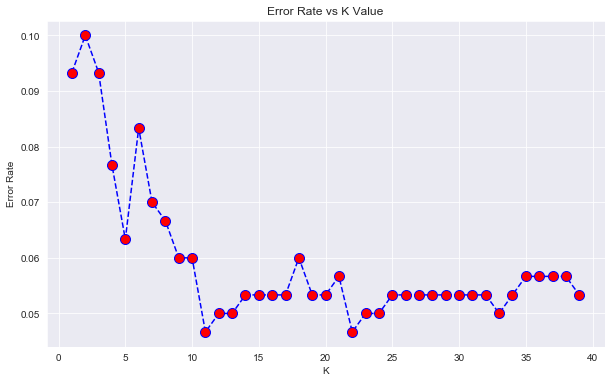

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), error_rate, color = 'blue', ls = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [25]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[149  10]
 [  6 135]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       159
           1       0.93      0.96      0.94       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [26]:
knn = KNeighborsClassifier(n_neighbors = 36)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[149  10]
 [  7 134]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       159
           1       0.93      0.95      0.94       141

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



_____
## Exercise

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [28]:
data = pd.read_csv('C:\\Users\\PC\\Desktop\\Python\\Udemy - P for DS and ML Bootcamp\\14-K-Nearest-Neighbors\\KNN_Project_Data.csv')

data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

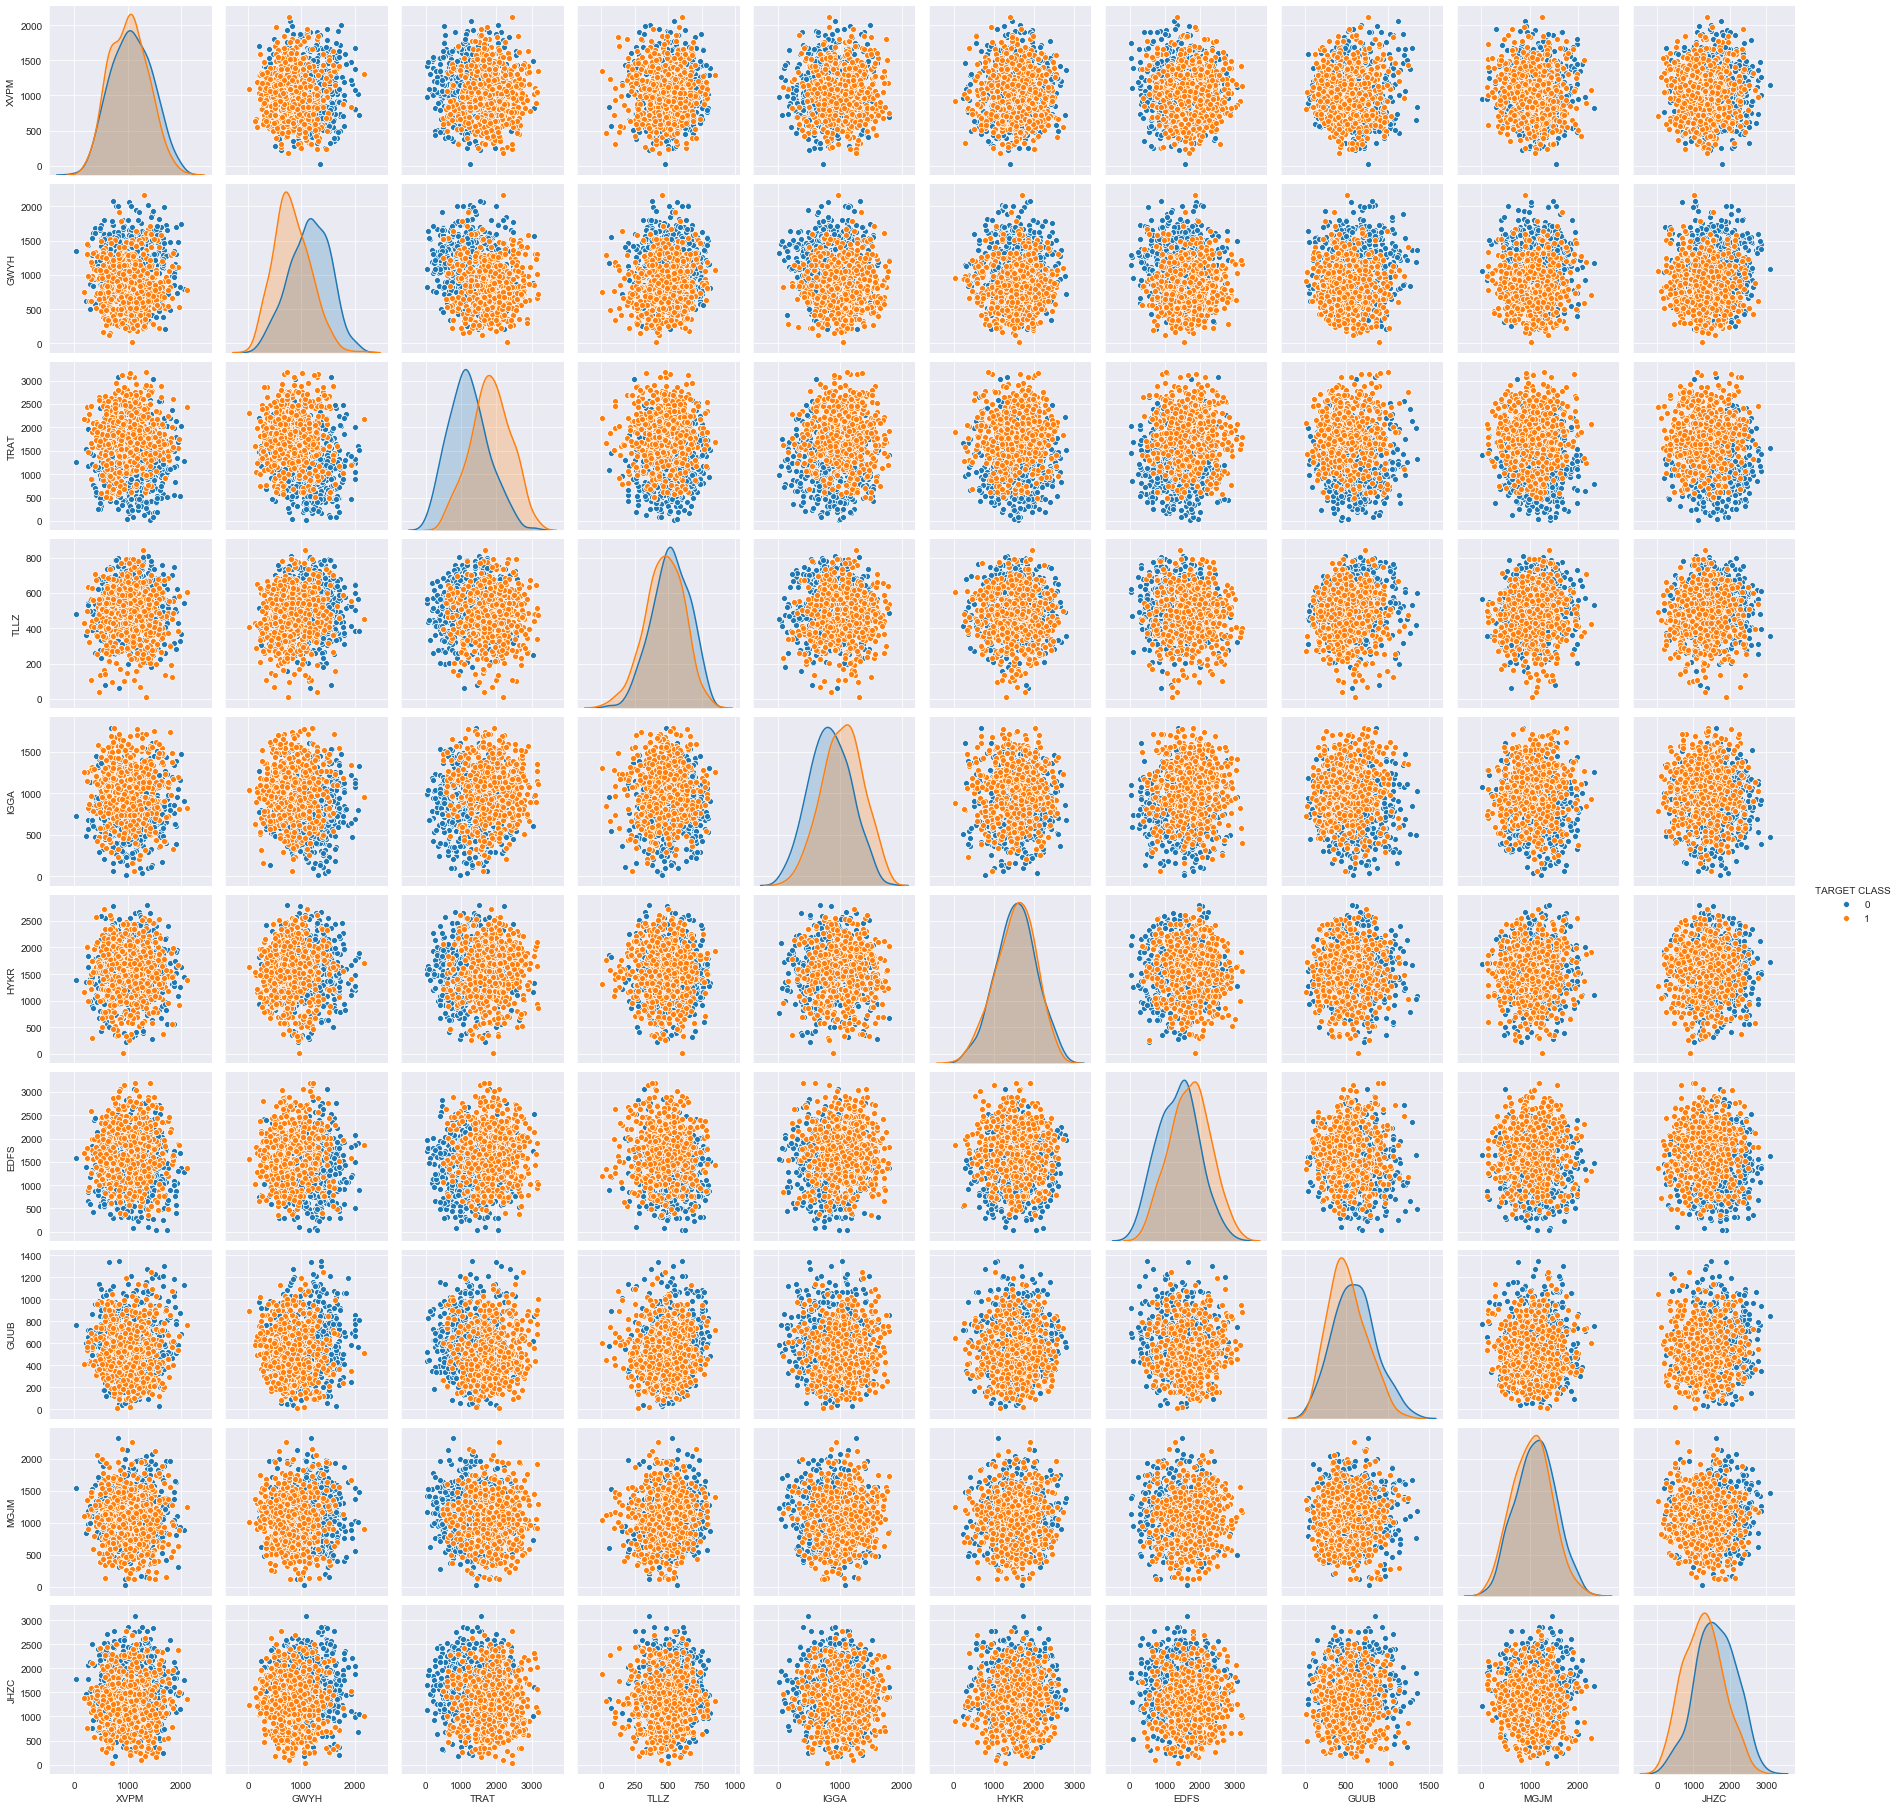

In [29]:
sns.pairplot(data, hue = 'TARGET CLASS')

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.drop('TARGET CLASS', axis = 1))

scaled_features = scaler.transform(data.drop('TARGET CLASS', axis = 1))
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [31]:
data_feat = pd.DataFrame(scaled_features, columns = data.columns[:-1])
data_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [32]:
from sklearn.model_selection import train_test_split

X = data_feat
y = data['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [34]:
pred = knn.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[109  43]
 [ 41 107]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [36]:
error_rate = []

for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

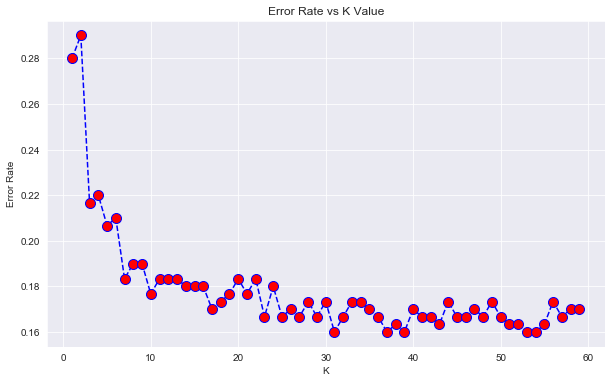

In [37]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 6))
plt.plot(range(1, 60), error_rate, color = 'blue', ls = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
knn = KNeighborsClassifier(n_neighbors = 30)

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[124  28]
 [ 24 124]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



## More Exercises

I want to practice KNN with the Titanic survivers dataset.

I'm using [this](https://medium.com/analytics-vidhya/titanic-machine-learning-by-k-nearest-neighbors-knn-algorithm-530d8bdd8323) article as a reference.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titan = sns.load_dataset('Titanic')
titan.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [83]:
corr_matrix = titan.corr()
corr_matrix['survived'].sort_values(ascending = False)

survived      1.000000
fare          0.257307
parch         0.081629
sibsp        -0.035322
age          -0.077221
alone        -0.203367
pclass       -0.338481
adult_male   -0.557080
Name: survived, dtype: float64

In [87]:
titan['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

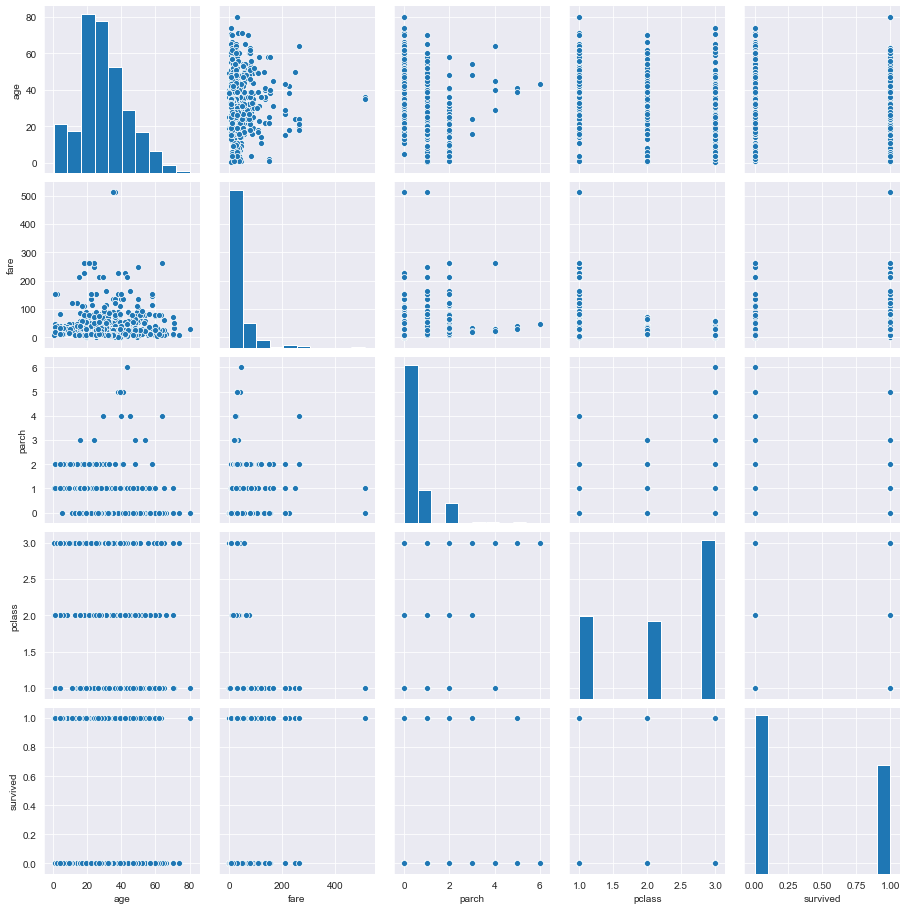

In [91]:
sns.pairplot(data = titan[['age', 'fare', 'parch', 'pclass', 'survived']].dropna())

In [103]:
titan.info()
titan['embarked'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


S    644
C    168
Q     77
Name: embarked, dtype: int64

In [92]:
data = titan[['age', 'fare', 'pclass', 'parch', 'survived']].dropna()

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.drop('survived', axis = 1))

scaled_features = scaler.transform(data.drop('survived', axis = 1))
scaled_features

array([[-0.53037664, -0.51897787,  0.91123237, -0.50589515],
       [ 0.57183099,  0.69189675, -1.47636364, -0.50589515],
       [-0.25482473, -0.50621356,  0.91123237, -0.50589515],
       ...,
       [-0.73704057, -0.08877362, -1.47636364, -0.50589515],
       [-0.25482473, -0.08877362, -1.47636364, -0.50589515],
       [ 0.15850313, -0.50952283,  0.91123237, -0.50589515]])

In [94]:
data_feat = pd.DataFrame(scaled_features, columns = data.columns[:-1])
data_feat.head()

,age,fare,pclass,parch
0,-0.530377,-0.518978,0.911232,-0.505895
1,0.571831,0.691897,-1.476364,-0.505895
2,-0.254825,-0.506214,0.911232,-0.505895
3,0.365167,0.348049,-1.476364,-0.505895
4,0.365167,-0.503850,0.911232,-0.505895


In [95]:
X = data_feat
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[83 40]
 [32 60]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.70       123
           1       0.60      0.65      0.63        92

    accuracy                           0.67       215
   macro avg       0.66      0.66      0.66       215
weighted avg       0.67      0.67      0.67       215



In [98]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

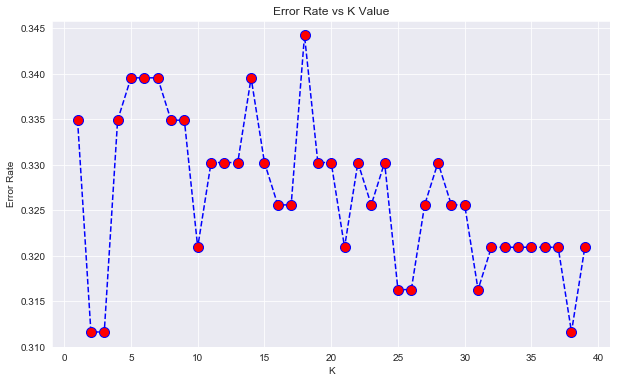

In [99]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), error_rate, color = 'blue', ls = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [101]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[95 28]
 [39 53]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       123
           1       0.65      0.58      0.61        92

    accuracy                           0.69       215
   macro avg       0.68      0.67      0.68       215
weighted avg       0.69      0.69      0.69       215



This can be improved: 